# Fintrace Tutorial

## Fabry Perot Cavity


Laser:
+-------+---------------+-------+--------------------------------------------+-----------------+
|  Name |  Position[m]  | P [W] |                   q [m]                    | normAngle [deg] |
+-------+---------------+-------+--------------------------------------------+-----------------+
| Laser | [0.000 0.000] |  1.0  | [-0.00e+00+2.66e+01j, -0.00e+00+2.66e+01j] |      0.000      |
+-------+---------------+-------+--------------------------------------------+-----------------+

Components:
+------+--------------+-----------+--------------+-----+-----------------+------+-----+------+----------------------+------------+---------------+----------+------------------+
| Name | Position [m] | AOI [deg] | diameter [m] |  L  | normAngle [deg] |  n   |  R  | R_AR |       RoC [m]        | RoC_AR [m] | thickness [m] |    T     | wedgeAngle [deg] |
+------+--------------+-----------+--------------+-----+-----------------+------+-----+------+----------------------+------------+----------

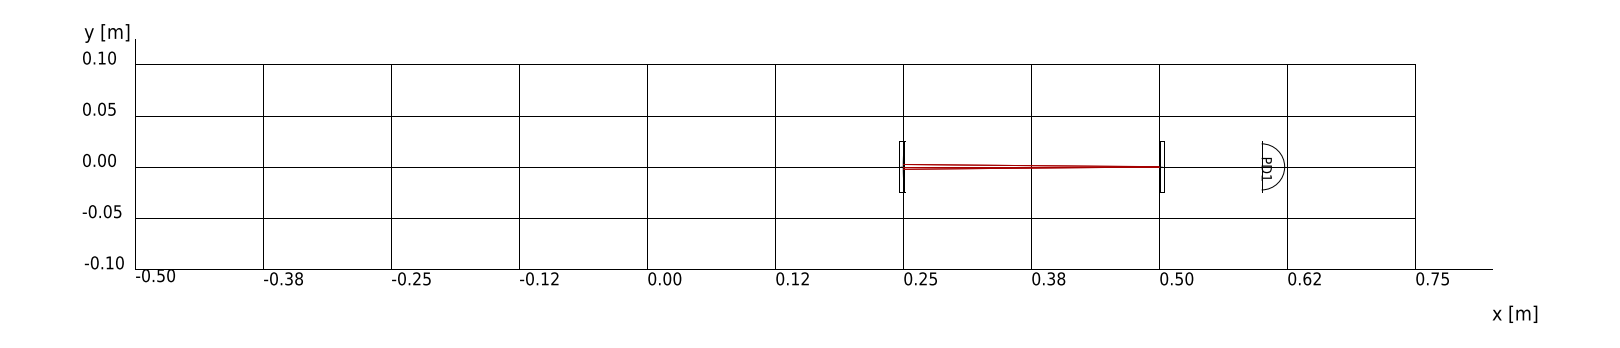

In [1]:
from fintrace.model import FintraceModel

# Instantiation
model = FintraceModel()
gdict, cavities, detectors = model.build_from_yaml("fabryperot/fp_test.yaml", gtrace=True, verbose=True)

# Plotting the cavity with gtrace using a laser
model.gtrace_plot(gdict, finesse_cavities=cavities, finesse_detectors=detectors, render=True,
                  beam_origin='laser', grid=True, draw_width=True, savefile='fabryperot/fp_gtrace_laser',
                  img_res=600, power_threshold=1e-2)

# Plotting the cavity with gtrace using the defined cavity
model.gtrace_plot(gdict, finesse_cavities=cavities, finesse_detectors=detectors, render=True,
                  beam_origin='cavity', grid=True, draw_width=True, savefile='fabryperot/fp_gtrace_cavity',
                  img_res=600, power_threshold=1e-3)

# Plotting a cavity eigenmode beamtrace
model.trace_cavities(['all'], savepath='fabryperot/fp_trace')

## Rerun
Notice how the laser beam is not mode-matched to the cavity. Try adding the `Match` flag with the cavity name in the `.yaml` file to the `Laser` object, and rerunning the code. You should see now the cavity eigenmode and the beamtrace from the laser are identical.

Add `Match: FabryPerot` under the `Laser` key in `fp_test.yaml`.

## Bowtie Cavity 

Here we use the bowtie cavity example.

This section demonstrates more techniques with gtrace renderings, cavity beam tracing, arbitrary beam tracing, as well as integrating Finesse analyses.

### Gtrace Rendering

Here is shown the difference between rendering the cavity eigenmode and rendering a non-sequential beam propagation from our laser source in the `.yaml`. The number of ghost beams traced in the non-sequential trace rendering is dependent on the `power_threshold`, such that we can get an estimate of what power those beams would contain. These are affected also by the transmission coefficients of the mirrors used in the model. This behavior is not observed in the cavity eigenmode rendering as it is doing a sequential beam propagation, and stopping after a round trip.

### Cavity Traces

The cavity tracing produces a plot showing the beam evolution through the cavities in the model (if we use the arg `['all']`), otherwise it will only plot those traces specified in the list of desired cavities. With this cavity trace, we can examine the q-parameter and other values at any node in our cavity (i.e. the beamwidth at M3.fr1.i). Note, it will try to analyze the nodes in each of the cavities that are being traced; if a node is not in a cavity, a warning will be produced.

### Beam Traces

The beam tracing produces a plot showing the beam evolution from the start and end nodes defined by the user. With this beam trace, we can examine the q-parameter and other values at any node in our path (i.e. the beamwidth at M3.fr1.i). Note, the user can also specify the input q-parameter to be propagated through the calculated path.

### Finesse Actions

With photodiodes added to the model, the user can also utilize any of the Finesse actions like `Xaxis` to perform analyses like measuring transmitted and reflected power.


Laser:
+-------+---------------+-------+--------------------------------------------+-----------------+
|  Name |  Position[m]  | P [W] |                   q [m]                    | normAngle [deg] |
+-------+---------------+-------+--------------------------------------------+-----------------+
| Laser | [0.000 0.000] |  1.0  | [-3.78e-01+4.58e-02j, -3.79e-01+1.47e-01j] |      0.000      |
+-------+---------------+-------+--------------------------------------------+-----------------+

Components:
+------+---------------+-----------+--------------+-----+-----------------+------+-----+------+----------------------+------------+---------------+----------+------------------+
| Name |  Position [m] | AOI [deg] | diameter [m] |  L  | normAngle [deg] |  n   |  R  | R_AR |       RoC [m]        | RoC_AR [m] | thickness [m] |    T     | wedgeAngle [deg] |
+------+---------------+-----------+--------------+-----+-----------------+------+-----+------+----------------------+------------+-------

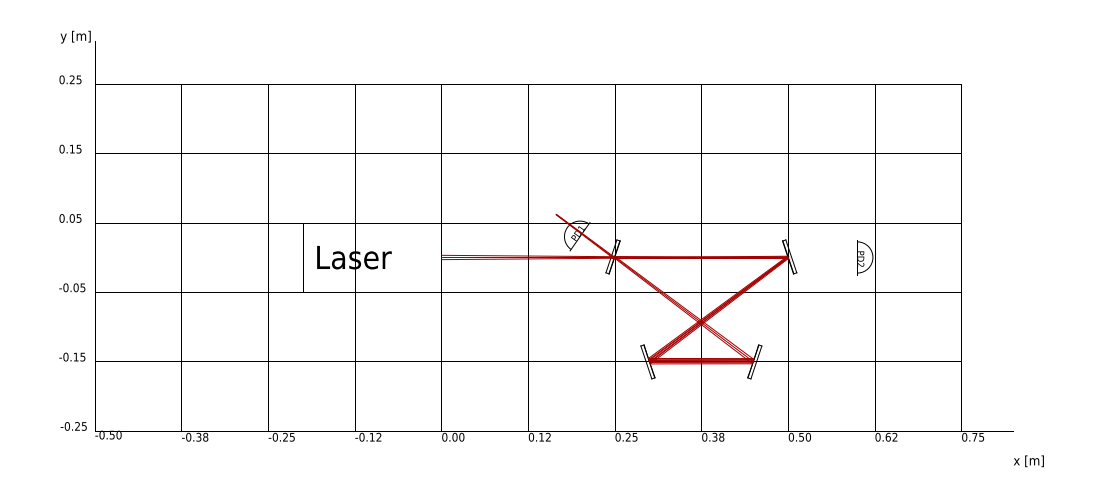

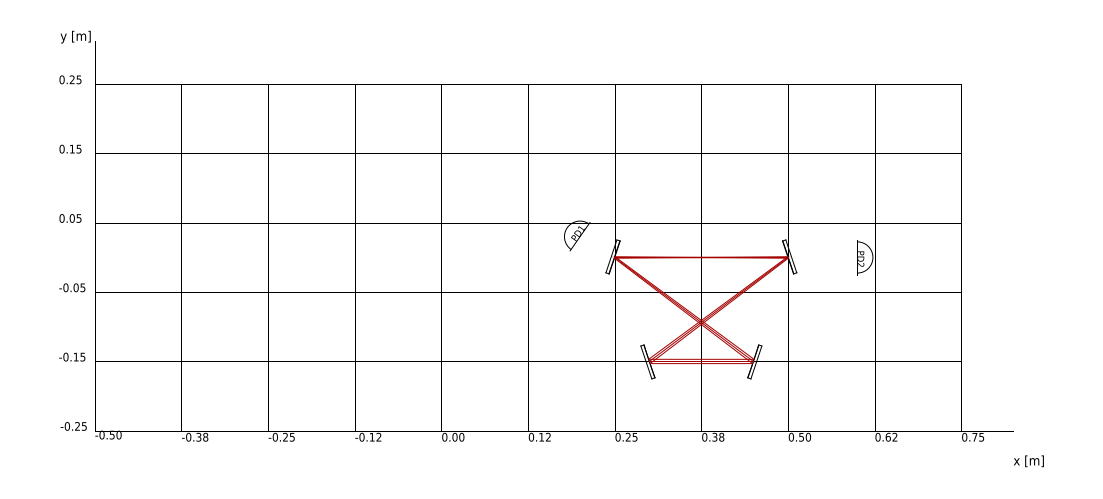

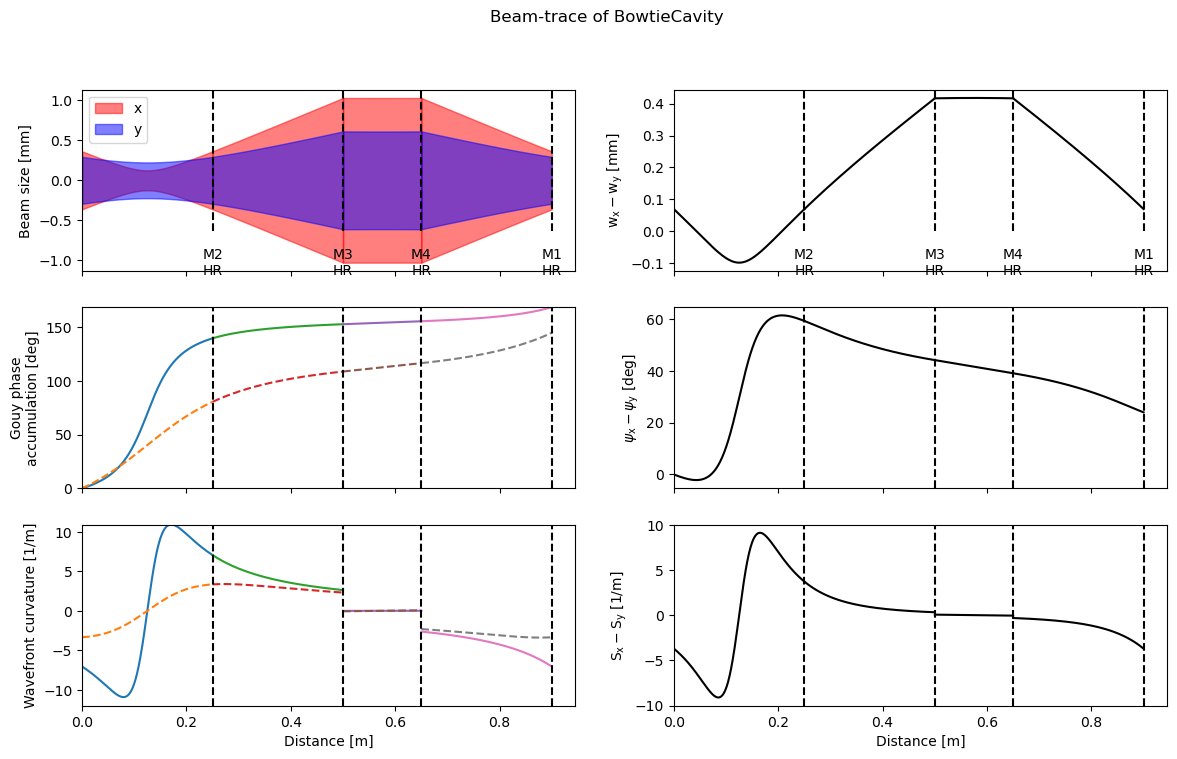

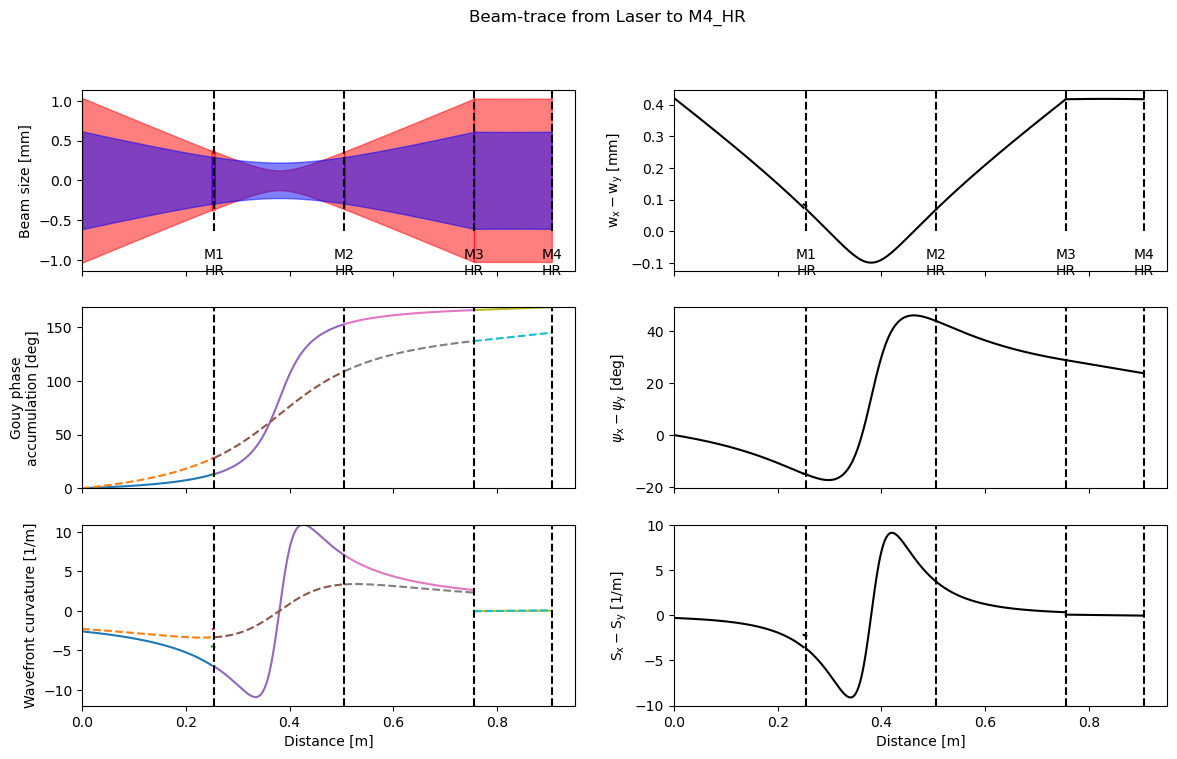

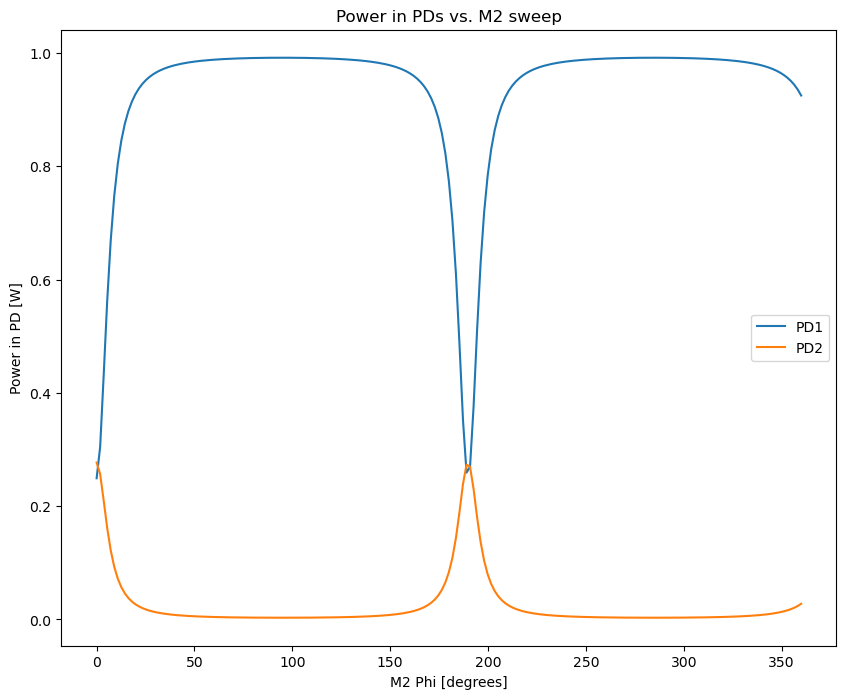

In [5]:
# Instantiation
model = FintraceModel()
gdict, cavities, detectors = model.build_from_yaml("bowtie/bowtie_test.yaml", gtrace=True, verbose=True)

# Plotting the cavity with gtrace using a laser
model.gtrace_plot(gdict, finesse_cavities=cavities, finesse_detectors=detectors, render=True,
                  beam_origin='laser', grid=True, draw_width=True, savefile='bowtie/bowtie_gtrace_laser',
                  img_res=600, power_threshold=5e-2)

# Plotting the cavity with gtrace using the defined cavity
model.gtrace_plot(gdict, finesse_cavities=cavities, finesse_detectors=detectors, render=True,
                  beam_origin='cavity', grid=True, draw_width=True, savefile='bowtie/bowtie_gtrace_cavity',
                  img_res=600)

# Plotting a cavity eigenmode beamtrace
model.trace_cavities(['all'], savepath='bowtie/bowtie_trace', q_at=["M2.fr2.o" ,"M3.fr1.i"])

# Plotting beam between just M2 and M4
model.trace_beam(['Laser.fr.o', 'M4.fr1.i'], savepath='bowtie/bowtie_beam', plot=True)

# Now we can also do things in finesse like actions
from finesse.analysis.actions import Xaxis
import matplotlib.pyplot as plt

xaxis = Xaxis(model.M2.phi, mode='lin', start=0, stop=360,
              steps=200)
sol = model.run(xaxis)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.plot(sol.x[0], sol['PD1'], label='PD1')
axs.plot(sol.x[0], sol['PD2'], label='PD2')
axs.set_title("Power in PDs vs. M2 sweep")
axs.set_xlabel("M2 Phi [degrees]")
axs.set_ylabel("Power in PD [W]")
axs.legend()
plt.savefig("bowtie/power_sweep.png")

